In [1]:
import numpy as np
import matplotlib.pyplot as plt
from potential1D import Potential1D
from scipy.optimize import  root_scalar
from scipy.special import gamma, factorial2, hyperu, genlaguerre, factorial

# 3D isotropic harmonic oscillator

=========== calculating cos and sin  FINISHED! ====
=========== FINISHED in 0.2603 secs. ==============
=========== generate Hamiltonian ... ==============
=========== generate Hamiltonian FINISHED! ========
=========== FINISHED in 0.2965 secs. ==============
=========== digonal the Hamiltonian ... ===========
=========== digonal the Hamiltonian FINISHED! =====
=========== FINISHED in 0.3071 secs. ==============
=========== generate wave function ... ============
check normalization:  0.9999999685587031
check normalization:  0.9999998806181012
check normalization:  0.9999997077813461
=========== generate wave function FINISHED! ======
=========== FINISHED in 0.9494 secs. ==============
bound states eigenergy is:  [3.50001745 5.50006639 7.50016268]


Text(0.2, 0.2, 'dashed line: analytic solution')

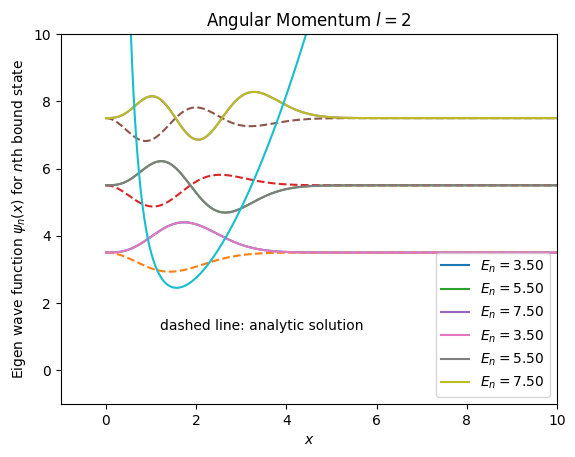

In [8]:
def psi_rel(r, k, L, a_ho=1):
    """
    analytic solution for the 3D isotropic harmonic oscillator.
    https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator#Example:_3D_isotropic_harmonic_oscillator
    """
    nu = 1/(2*a_ho**2)

    N_kl = 2**(k+2*L+3)*factorial(k)*nu**L
    N_kl /= factorial2(2*k + 2*L + 1)
    N_kl *= np.sqrt(2*nu**3/np.pi)
    N_kl = np.sqrt(N_kl)

    pr = N_kl * r**L * np.exp(-nu*r**2) * genlaguerre(k, L+1/2)(2*nu*r**2)
    return pr


def normallizeV(V: callable, w, N):
    """
    cut the divergent part of the potential.
    Assume the potential is from 0 to some value
    """
    T = 2*np.pi/w
    energy_cut = N*w*10
    r0 = root_scalar(lambda x:V(x)-energy_cut, method='newton', x0=1e-10).root
    r1 = root_scalar(lambda x:V(x)-energy_cut, method='newton', x0=T).root
    a = r1-r0

    def normedV(x):
        x += 1e-10
        get_outer = -np.sign((x-r0)*(r1-x))/2 + 1/2
        get_inner = 1 - get_outer
        return get_outer*energy_cut + get_inner*V(x)
    points = []
    for r in [r0, r1]:
        if r < T:
            points.append(r)
    return normedV, points


levels = 3
N = 201
w = .1
w0 = 1
T = 2*np.pi/w
l = 2

def Veff(x, w0=w0, l=2):
    return (w0*(x))**2/2 + l*(l+1) / (2*(x)**2)

nV, points = normallizeV(Veff, w, N)

p3d = Potential1D(V=lambda x:nV(x), N=N, w=w,
                  verbose=1, points=points, zero='left')

vals = p3d.get_eigenvals(levels=levels)
wf = p3d.get_eigenwf(xs = np.linspace(0, 10, 1000))
print('bound states eigenergy is: ', vals)

for j in range(levels):
    plt.plot(p3d.xs, wf[j] + vals[j],
             label=r'$E_n='+f'{vals[j]:.2f}'+r'$')
    plt.plot(p3d.xs, -psi_rel(r=p3d.xs, k=j, L=l)+ vals[j], '--')

for j in range(levels):
    plt.plot(p3d.xs, wf[j] + vals[j],
             label=r'$E_n='+f'{vals[j]:.2f}'+r'$')

plt.xlabel(r'$x$')
plt.ylabel(r'Eigen wave function $\psi_n(x)$ for $n$th bound state')
plt.plot(p3d.xs, nV(p3d.xs))
plt.ylim(-1, 10)
plt.xlim(-1, 10)
plt.legend()
plt.title(r'Angular Momentum $l=$' + f'{l:n}')
plt.text(0.2, 0.2, 'dashed line: analytic solution', transform=plt.gca().transAxes)